In [36]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from feedforward import NN

In [37]:
import os
input_loc = os.getcwd()

In [38]:
np.set_printoptions(suppress=True)

In [39]:
batch_size = 32
epoch_size = 15
learning_rate = 0.001

In [40]:
model = NN(784, 300, 200, 10)

Number of weight: (784, 300)
Number of weight: (300, 200)
Number of weight: (200, 10)


In [41]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Shuffle the training data

In [42]:
permutation = np.random.permutation(len(train_images))
train_images = train_images[permutation]
train_labels = train_labels[permutation]

In [43]:
n_samples = 60000
train_images = train_images[:n_samples]
train_labels = train_labels[:n_samples]
print('Train size:', len(train_labels))

Train size: 60000


In [44]:
l_train_loss = []
l_train_err = []
l_val_loss = []
l_val_err = []
for i in range(epoch_size):
    # Training
    train_loss, train_acc = model.train(train_images, train_labels, learning_rate, batch_size)
    l_train_loss.append(train_loss)
    l_train_err.append(1 - train_acc)

    # Evaluation
    val_loss = 0
    val_correct = 0
    for image, label in zip(test_images, test_labels):
        _, loss, y_pred = model.predict(image, label)
        val_loss += loss
        val_correct += y_pred
    
    n_tests = len(test_labels)
    val_loss /= n_tests
    val_correct /= n_tests
    val_err = 1 - val_correct
    l_val_loss.append(val_loss)
    l_val_err.append(val_err)
    print('[Epoch %d] Train_loss %.3f | Val_loss: %.3f | Test_error %.2f' %(i + 1, train_loss, val_loss, val_err))

[Epoch 1] Train_loss 1.481 | Val_loss: 0.768 | Test_error 0.23
[Epoch 2] Train_loss 0.696 | Val_loss: 0.598 | Test_error 0.18
[Epoch 3] Train_loss 0.563 | Val_loss: 0.522 | Test_error 0.16
[Epoch 4] Train_loss 0.491 | Val_loss: 0.475 | Test_error 0.14
[Epoch 5] Train_loss 0.442 | Val_loss: 0.442 | Test_error 0.13
[Epoch 6] Train_loss 0.406 | Val_loss: 0.418 | Test_error 0.13
[Epoch 7] Train_loss 0.379 | Val_loss: 0.398 | Test_error 0.12
[Epoch 8] Train_loss 0.356 | Val_loss: 0.382 | Test_error 0.12
[Epoch 9] Train_loss 0.338 | Val_loss: 0.369 | Test_error 0.11
[Epoch 10] Train_loss 0.321 | Val_loss: 0.358 | Test_error 0.11
[Epoch 11] Train_loss 0.307 | Val_loss: 0.348 | Test_error 0.10
[Epoch 12] Train_loss 0.295 | Val_loss: 0.339 | Test_error 0.10
[Epoch 13] Train_loss 0.283 | Val_loss: 0.332 | Test_error 0.10
[Epoch 14] Train_loss 0.273 | Val_loss: 0.325 | Test_error 0.10
[Epoch 15] Train_loss 0.264 | Val_loss: 0.319 | Test_error 0.10


input_loc = path.join(path.dirname(__file__)) <br>
plt.plot(l_train_loss, label='Train loss')<br>
plt.plot(l_val_loss, label='Validation loss')<br>
plt.xlabel('Epochs')<br>
plt.ylabel('Loss')<br>
plt.title('Learning curve')<br>
plt.legend()

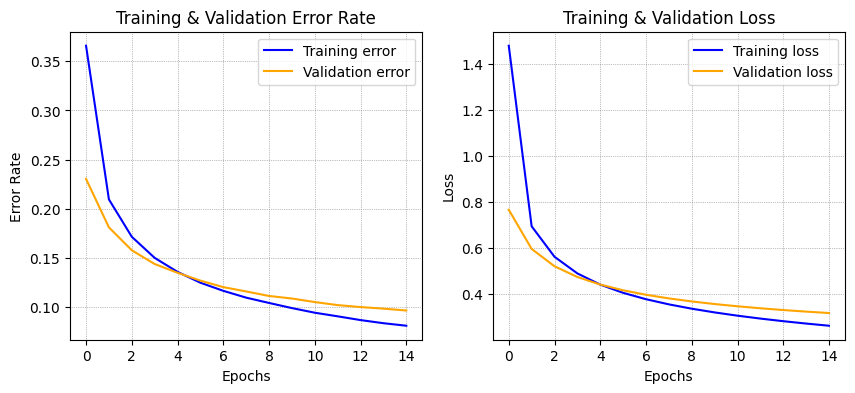

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(l_train_err, 'b', label='Training error')
ax[0].plot(l_val_err, 'orange', label='Validation error')
ax[0].set_title('Training & Validation Error Rate')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Error Rate')
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(l_train_loss, 'b', label='Training loss')
ax[1].plot(l_val_loss, 'orange', label='Validation loss')
ax[1].set_title('Training & Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
#
ax[1].grid(color='gray', linestyle=':', linewidth=0.5)
ax[0].grid(color='gray', linestyle=':', linewidth=0.5)
plt.savefig(input_loc + '/hw4_3_4_2.pdf', format='pdf', bbox_inches='tight') # Must be called before show()